# **Summary**

For Project 2, our group’s goal was to build algorithms and models that could predict the likelihood that a person develops coronary heart disease (CHD). To do this, we worked with provided data that was sourced from The Framingham Study: An Epidemiological Investigation of Cardiovascular Disease.
Our methods of investigating this question started with cleaning the data for consistency and preprocessing the data for model training. This step consisted of addressing missing values by dropping them as well as employing winsorizing to handle outliers. We then explored the new dataset with visualizations like k-density plots and regplots. Combining the insights we had from the visualizations as well as from class, we chose appropriate algorithms based on the problem we were working with and the data characteristics and trained our models. We then evaluated the performance of our models, using R-squared as the performance value, allowing us to gauge which models were more likely to predict the likelihood of a person to develop CHD.


In [ ]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 96, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 96 (delta 27), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (96/96), 9.50 MiB | 7.00 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Pipeline tools:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Variable transformers for cleaning:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
# Analytics:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
# Grab raw data
df = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_train.csv")
print(df.shape)
print()

(3180, 17)



# **Data**

The first step that was taken to prepare the data for analysis was removing missing values. Missing values were dropped from both the training and testing data sets. Both data sets maintained a relatively similar train test split proportion after the missing values were dropped. After the missing values were dealt with, we checked for outliers in the data set by plotting boxplots of the numerical predictors. After identifying the outliers using the interquartile range method, we used the winsorizing method to deal with the outliers for further analysis. We used the winsorizing method as opposed to trimming in order to prevent any adverse effects when implementing models and classification techniques. After winsorizing outliers, the data was explored using k-density and regplots. The TenYearCHD variable was plotted using a k-density plot and described using basic counts. The mean of the TenYearCHD variable, from the .describe() function, indicates the proportion of people who have an elevated risk of coronary heart disease. About 15% of the sampled individuals had elevated risk of coronary heart disease. Additional k-density plots were created in order to visualize the relationships between the predictors with TenYearCHD variable. General shapes between the levels of categorical variables and the levels of the TenYearCHD variable were similar and notable differences arose in the magnitude as there were significantly less people with elevated levels of coronary heart disease. Regplots were also deployed to visualize the relationship between the numeric predictors and the TenYearCHD variable. All of the numeric predictors showed a weak relationship with the TenYearCHD variable as apparent by the lack of distinct s-curves to show a strong relationship with regards to a binary variable.

In [ ]:
# Remove all missing values/na's
print(df.isna().sum()) # a lot of na's present in the dataset
df = df.dropna() # drop all na's (refer to appendix A for alternative methods attempted)
print(df.shape) # observe new dataframe shape
print(df.head()) # observe new data

In [ ]:
# Testing data dimensions before and after NA's are dropped
df_test = pd.read_csv("/content/DS-3001-Projects/Project 2/fhs_test.csv")
print(df_test.shape)
df_test = df_test.dropna()
print(df_test.shape)

In [ ]:
# Outlier detection of numeric variables and winsorizing of outliers

numeric_only = df.loc[:,['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose']]
numeric_only.plot.box()
plt.xticks(rotation=90)
plt.show()
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

df['cigsPerDay'] = winsorize(df['cigsPerDay'])
df['totChol'] = winsorize(df['totChol'])
df['sysBP'] = winsorize(df['sysBP'])
df['diaBP'] = winsorize(df['diaBP'])
df['BMI'] = winsorize(df['BMI'])
df['heartRate'] = winsorize(df['heartRate'])
df['glucose'] = winsorize(df['glucose'])

# sns.boxplot( winsorize(numeric_only['glucose']))
# plt.show()
df.plot.box()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Response Variable plot
sns.kdeplot(df,x="TenYearCHD")
print(df['TenYearCHD'].describe())
df['TenYearCHD'].value_counts()

In [ ]:
# Main EDA visualizations (Density Plots)

sns.kdeplot(data=df,x='age',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sex',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='education',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='currentSmoker',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='cigsPerDay',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BPMeds',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentStroke',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='prevalentHyp',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diabetes',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='totChol',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='sysBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='diaBP',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='BMI',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='heartRate',hue='TenYearCHD')
plt.show()
sns.kdeplot(data=df,x='glucose',hue='TenYearCHD')
plt.show()


In [ ]:
# Finalize data from Pandas:

# Training
y = df['TenYearCHD']

Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


# Testing
y_test= df_test["TenYearCHD"]

X_test = df_test.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
       'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
       'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


# Set up variable preprocessing:
cat_vars = ['sex','education','currentSmoker','BPMeds',
           'prevalentStroke','prevalentHyp','diabetes'] # List of categorical variables
num_vars = ['age','cigsPerDay', 'totChol','sysBP',
           'diaBP', 'BMI', 'heartRate', 'glucose'] # List of numeric variables

cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
                                 ])

# Column transformer:
preprocessor = ColumnTransformer(
    transformers = [('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
                    ('num', num_pipeline, num_vars)]) # Transform num_vars by num_pipeline

# Create model-specific pipelines:
lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('linreg', LinearRegression(fit_intercept=False))]) # Link preprocessor to model
tree_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                ('tree', DecisionTreeRegressor(max_depth = 6))]) # Link preprocessor to model

# Train-test split: (This step not needed since our datasets are already divided by training and testing)
#X_train, X_test, y_train, y_test = train_test_split(Z, y, # Feature and target variables
#                                                    test_size=.2) # For replication purposes

# Fit the models:
lm = lm_pipe.fit(Z, y)
tree = tree_pipe.fit(Z, y)

# Linear Results on Train
print('Linear Model rsq: ', lm.score(Z, y) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients

# Tree Results on Train
print('Tree rsq: ', tree.score(Z, y) )

Linear Model rsq:  0.09524148525542797
[-1.03981940e+12 -1.03981940e+12 -2.11076272e+12 -2.11076272e+12
 -2.11076272e+12 -2.11076272e+12 -4.29479729e+12 -4.29479729e+12
  3.92535004e+12  3.92535004e+12  2.88953033e+12  2.88953033e+12
 -2.05356207e+12 -2.05356207e+12  2.68406110e+12  2.68406110e+12
  6.10193119e-02  3.32641602e-02  1.12762451e-02  5.15518188e-02
 -1.89666748e-02 -4.93621826e-03  1.51062012e-03  5.68771362e-03]
Tree rsq:  0.2321684351230866
Accuracy:  0.7571115973741794 



col_0,0,1
TenYearCHD,,
0,766,15
1,123,10


Linear Model rsq:  0.08692509724670894
[-1.03981940e+12 -1.03981940e+12 -2.11076272e+12 -2.11076272e+12
 -2.11076272e+12 -2.11076272e+12 -4.29479729e+12 -4.29479729e+12
  3.92535004e+12  3.92535004e+12  2.88953033e+12  2.88953033e+12
 -2.05356207e+12 -2.05356207e+12  2.68406110e+12  2.68406110e+12
  6.10193119e-02  3.32641602e-02  1.12762451e-02  5.15518188e-02
 -1.89666748e-02 -4.93621826e-03  1.51062012e-03  5.68771362e-03]
Tree rsq:  -0.002072798097890516


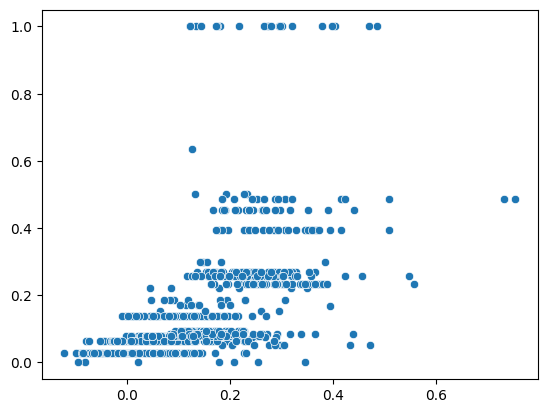

In [ ]:
# Extract results:

# Linear Results on Test
print('Linear Model rsq: ', lm.score(X_test, y_test) ) # R-squared
print(lm.named_steps['linreg'].coef_) # Regression coefficients
y_hat_lm = lm.predict(X_test) # Predicted values

# Tree Results on Test
print('Tree rsq: ', tree.score(X_test, y_test) ) # R-squared
y_hat_tree = tree.predict(X_test)

# Plot
sns.scatterplot(x=y_hat_lm, y=y_hat_tree)
plt.show()

# **Results**

After cleaning our data, we began the process of using the tools we learned in class to try to predict the likelihood of a person developing coronary heart disease. We started by using a multiple linear regression model with the variable ‘TenYearCHD’ as our target variable. We tried various combinations of our predictor variables to try to find the ones that would result in the highest R-squared value. The combinations we tried included using the top predictive variables according to science out of the ones we were given, categorical variables, and numeric variables. We tested each of these individually, but all of them resulted in worse model performance as the R-squared value was lower and significantly less than 0.1 . Eventually, we settled on using all of the variables from the dataset, resulting in an R-squared value of 0.0869 for our linear model. We also used a decision tree, resulting in an R-squared value of -0.0021. We found these results quite interesting since our training dataset with the linear regression performed with an R-squared value of 0.0952 while the decision tree performed better with an R-squared value of 0.232. However, in general, our models are not the most accurate in terms of predicting the likelihood of coronary heart disease. Some ways we could improve our project in the future are by selecting different variables, using different models, or cleaning the data differently for our analysis.
Likewise, our tables, plots, and statistics also do not contribute significantly to support our conclusion. Because of the binary nature of some of the variables, it also made it difficult to make easily understandable visualizations. We did attempt to make kernel density plots, choosing various variables for the x-variable with TenYearCHD as the y-variable. However, the kernel density plots failed to indicate any significant patterns, similar to our conclusions for our linear regression and tree models. Regplots were also implemented to explore the relationships of the predictors with the response variable. However, no significant relationships were found either.  
Regarding our research strategy, we did carry out the process correctly by cleaning our data and then creating our models. We also tried many different iterations of our research strategy, changing things each time to try to improve the process. Despite our efforts, we still did not have the result that we were hoping for, which was an R-squared value of above 0.3. Therefore, it is a bit difficult to try to interpret our results and form data-backed conclusions. Because our research strategy failed, our team spent some time discussing what we could do in the future to improve our results. Starting with the data, we wonder if part of the difficulty of the process came from the variables themselves. The dataset had quite a few binary variables, which may have affected our results. Finally, this was our first time attempting a project like this. There are many skills that we are unfamiliar with; and, we believe that if we were more experienced with the concepts and tools the results of our analysis would have a clearer conclusion.


# **Conclusion**

To summarize, our group’s goal for this project was to build algorithms and models that could predict the likelihood that a person develops coronary heart disease (CHD). We worked with provided data that was sourced from The Framingham Study: An Epidemiological Investigation of Cardiovascular Disease. Our methods of investigating this question consisted of cleaning and preprocessing the data, visualizing the data, choosing appropriate algorithms, training the models, and finally evaluating the performance of the models.
Despite our consistent experimentation and employment of alternative methods within our processes, the performance of our models were quite low, being around or less than 0.1, indicating that they are weak predictors of the likelihood that a person develops CHD. Our team concluded that we may need to either transform/clean the variables differently or experiment with different models. However, we also concluded that there is quite a limitation to this dataset which contributed to our low model performance and R-squared value because of a large majority of the dataset having binary variables, greatly affecting our results.
There is still much more that can be done beyond the scope of our project. Further work include using additional tools on the data such as bagging, boosting, stacking to improve performance of models, using different models and algorithms, not only finding outliers, but also setting a criteria for the possibly the removal of outliers if needed, and working with a larger dataset with possibly more variables in play to name a few.


# **Appendix**

Alternative attempts/methods that resulted in lower model performance

In [ ]:
# A

# Instead of dropping all missing values/na's:

# Remove all missing values/na's from categorical variables
# df.dropna(subset = ['sex','education','currentSmoker','BPMeds', 'prevalentStroke','prevalentHyp','diabetes'], inplace=True)

# Impute all numerical variables with median
# df['age'] = df['age'].fillna(df['age'].median())
# df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].median())
# df['totChol'] = df['totChol'].fillna(df['totChol'].median())
# df['sysBP'] = df['sysBP'].fillna(df['sysBP'].median())
# df['diaBP'] = df['diaBP'].fillna(df['diaBP'].median())
# df['BMI'] = df['BMI'].fillna(df['BMI'].median())
# df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())
# df['glucose'] = df['glucose'].fillna(df['glucose'].median())

In [ ]:
# B

# Instead of Z containing all variables at the finalizing data from pandas step, only use the categorical data or only use the numerical data:

# Z = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']] # num
# Z = df.loc[:,['sex', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']] # cat

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('num', num_pipeline, num_vars)])

# preprocessor = ColumnTransformer(
#      transformers = [ # Transform cat_vars by cat_pipeline
#                      ('cat', cat_pipeline, cat_vars)])

In [ ]:
# C

# Instead of dividing between cat and num and processing through their own pipelines, process all variables into one pipeline:

# vars = ['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
#        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
#        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
# ])

# preprocessor = ColumnTransformer(
#     transformers = [('catnum', pipeline, vars)])

In [ ]:
# D

# Used OLS method and looked at significance of variables to use only most significant ones

# import statsmodels.api as sm

# # Create your model
# X = df.loc[:,['sex','age','cigsPerDay',"totChol",'sysBP']]
# y = df['TenYearCHD']
# X = sm.add_constant(X) # Add a constant term if needed
# model = sm.OLS(y, X).fit()

# # Get the summary
# print(model.summary())

In [ ]:
# E

# Tried it with variables that showed a relationship between TenYearCHD

# Z = df.loc[:,['age','cigsPerDay']]
# y = df['TenYearCHD']
# X_test = df_test.loc[:,['age','cigsPerDay']]
# y_test = df_test['TenYearCHD']

# #cat_vars = ['education']
# num_vars = ['age','cigsPerDay']


# #cat_pipeline = Pipeline(steps = [('ohc', OneHotEncoder(sparse_output=False))]) # One hot encoding
# num_pipeline = Pipeline(steps = [('maxmin', StandardScaler()) # Maxmin scaling
#                                  ])
# preprocessor = ColumnTransformer(
#     transformers = [#('cat', cat_pipeline, cat_vars), # Transform cat_vars by cat_pipeline
#                     ('num', num_pipeline, num_vars)])

# lm_pipe = Pipeline(steps=[('preprocessor', preprocessor),
#                 ('linreg', LinearRegression(fit_intercept=False))])
# lm = lm_pipe.fit(Z, y)
# print('Linear Model rsq: ', lm.score(X_test, y_test))

In [ ]:
# F

# Finalize data from Pandas:
# df

# # y = df['TenYearCHD']

# # Z = df.loc[:,['sex', 'age', 'education', 'currentSmoker', 'cigsPerDay',
# #        'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol',
# #        'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]

# # x = df.loc[:,['age','cigsPerDay','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]


# df_logit = pd.get_dummies(df, columns=['sex','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes'], drop_first=True)

# # #view updated DataFrame

# df_logit= df_logit.astype(int)

# df_logit
# df_logit.columns.unique()

# y = df_logit['TenYearCHD']
# x = df_logit[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
#        'glucose', 'sex_1', 'education_2.0', 'education_3.0', 'education_4.0',
#        'currentSmoker_1', 'BPMeds_1.0', 'prevalentStroke_1', 'prevalentHyp_1',
#        'diabetes_1']]


# x = sm.add_constant(x)

# #fit regression model
# model = sm.OLS(y, x).fit()

# #view summary of model fit
# print(model.summary())

# logit_model = sm.Logit(y, x)
# result = logit_model.fit()
# print(result.summary())

In [ ]:
# G

# Tried out decision tree classification

# tree_pipe_2 = Pipeline(steps=[('preprocessor', preprocessor),
#                 ('tree', DecisionTreeClassifier(max_depth = 6))])

# tree_pipe_2 = tree_pipe_2.fit(Z, y)

# y_hat_tree = tree_pipe_2.predict(X_test)

# ## Confusion Matrix
# tab = pd.crosstab(y_test,y) # Compute confusion matrix
# acc = np.trace(tab)/np.sum(np.sum(tab,axis=0)) # Faster way to compute accuracy
# print('Accuracy: ', acc, '\n')
# pd.crosstab(y_test,y_hat_tree)

In [ ]:
# H

# Looked at relationships of predictors with response using regplots
# sns.regplot(data=df,x="age",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="cigsPerDay",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="totChol",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="sysBP",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="diaBP",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="BMI",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="heartRate",y="TenYearCHD", logistic=True, ci=None)
# plt.show()
# sns.regplot(data=df,x="glucose",y="TenYearCHD", logistic=True, ci=None)
# plt.show()